<h1><center>Natural Language Processing</center></h1>

<h3><center>NLP 08</center></h3>

![hM0xGrmJw](https://miro.medium.com/max/720/1*PGB0w1JZslqA-hM0xGrmJw.gif)

# Topics
1.	Introduction to Natural Language Processing
2.	Why learn NLP?
3.	Let's start playing with Python!
4.	Text Wrangling and Cleansing
 - Sentence splitter
 - Tokenization
 - Stemming         
 - Lemmatization    
 - Stop word removal
 - Diving into NLTK
5.	Vectorizing with Python
 - Count Vectorizer 
 - TF-IDF Vectorizer
6.	Modelling with Python 
 - Classification
 - Clustering
 - Sentiment Analysis <---------------------------------------------------- **This is where we are**


# Dictionary Based Sentiment Analysis

In [1]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [3]:
# nltk.download('opinion_lexicon') #Download Opinion Dictionary
positive_wds = set(opinion_lexicon.positive())
negative_wds = set(opinion_lexicon.negative())

In [21]:
positive_wds

{'principled',
 'fervent',
 'exaltingly',
 'astounded',
 'sagacity',
 'wise',
 'resourcefulness',
 'fulfillment',
 'respect',
 'purify',
 'exceptional',
 'hearten',
 'titillatingly',
 'justly',
 'playful',
 'unequivocal',
 'equitable',
 'favorited',
 'enchanted',
 'well-intentioned',
 'thrillingly',
 'spellbinding',
 'gallantly',
 'fastest',
 'brave',
 'spiritual',
 'booming',
 'stylized',
 'securely',
 'doubtless',
 'blissfully',
 'sturdier',
 'unconditional',
 'favorite',
 'reassurance',
 'virtue',
 'enjoying',
 'keenness',
 'dotingly',
 'energize',
 'romantic',
 'entrancing',
 'intriguing',
 'pride',
 'thank',
 'dead-cheap',
 'exceedingly',
 'pepped',
 'stunning',
 'fascinating',
 'creative',
 'earnestly',
 'affordably',
 'peach',
 'lead',
 'subsidizing',
 'unaffected',
 'advocates',
 'acumen',
 'outshone',
 'advantage',
 'praise',
 'piety',
 'talent',
 'peaceful',
 'beneficiary',
 'wellbeing',
 'marvel',
 'wisely',
 'pamperedness',
 'delight',
 'well-educated',
 'restored',
 'envia

In [23]:
negative_wds

{'exorbitant',
 'gawky',
 'unruly',
 'weakness',
 'non-confidence',
 'trash',
 'barbarically',
 'distrustful',
 'bastard',
 'credulous',
 'perplexity',
 'collapse',
 'shiver',
 'distains',
 'haunting',
 'slaughtered',
 'dissembler',
 'disorient',
 'smear',
 'unwatchable',
 'unusably',
 'afflict',
 'scratches',
 'dragged',
 'villian',
 'equivocal',
 'vagrant',
 'forbid',
 'monstrously',
 'polemize',
 'frazzled',
 'moody',
 'vengeful',
 'zaps',
 'desolate',
 'difficulties',
 'indignantly',
 'contagious',
 'stole',
 'unclear',
 'uncompromisingly',
 'interruptions',
 'extravagantly',
 'chafe',
 'cataclysmic',
 'ranting',
 'smelt',
 'degradingly',
 'bruised',
 'allegation',
 'hard-liner',
 'misunderstand',
 'refusal',
 'exagerated',
 'imposition',
 'sweaty',
 'degrading',
 'destabilisation',
 'tiresome',
 'dehumanization',
 'resentment',
 'bragger',
 'mudslinger',
 'quack',
 'intense',
 'falling',
 'baffled',
 'cutthroat',
 'tarnish',
 'desolately',
 'plotters',
 'rejects',
 'unobserved',
 

## Let's try

![](https://media.tenor.com/uVRxyYWMOa8AAAAC/cat-black-cat.gif)

In [19]:
def score_sent(sent):
    """Returns a score btw -1 and 1"""
    # Concerting to words
    words = word_tokenize(sent)
    words_lower = [x.lower() for x in words]
    
#     sent = [e.lower() for e in sent if e.isalnum()]
    total = len(words_lower)
    
    temp = []
    for i in words_lower:
        if i in positive_wds:
            temp.append(1)
        elif i in negative_wds:
            temp.append(-1)
        else:
            temp.append(0)
            
    return sum(temp) / len(temp)


In [15]:
score_sent('This is a happy sad sentence')

0.0

In [27]:
random_text = '''Colin Robert Chase (February 5, 1935 – October 13, 1984) was an American academic. An associate professor of English at the University of Toronto, he was known for his contributions to the studies of Old English and Anglo-Latin literature. His best-known work, The Dating of Beowulf, challenged the accepted orthodoxy of the dating of the Anglo-Saxon poem Beowulf, which was then thought to be a date in the latter half of the eighth century but now thought to be near the end of the first millennium, and he left behind what was described in A Beowulf Handbook as "a cautious and necessary incertitude".[1][2] Born in Denver, Chase was one of three sons of a newspaper executive and a Pulitzer Prize-winning playwright, Mary Coyle Chase. Chase's two brothers became actors; he considered such a career, but ultimately studied English literature, classics, and philosophy. He received his Bachelor of Arts from Harvard University, Master of Arts from Saint Louis and Johns Hopkins Universities, and Ph.D. from the University of Toronto in 1971, the same year the university named him an assistant professor. In addition to The Dating of Beowulf, Chase penned Two Alcuin Letter-Books—a scholarly collection of twenty-four letters by the eighth-century scholar Alcuin. He also wrote some eight articles and chapters, contributed to the Dictionary of the Middle Ages, and for nearly a decade wrote the Beowulf section of "This Year's Work in Old English Studies" for the Old English Newsletter. Chase died of cancer in 1984, shortly before his anticipated promotion to full professor.'''

In [29]:
score_sent(random_text)

0.010101010101010102

In [30]:
import pandas as pd
df = pd.read_csv('SPAM text.csv')

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df['Message'].apply(score_sent)

0       0.041667
1       0.000000
2       0.054054
3       0.000000
4       0.000000
          ...   
5567    0.085714
5568    0.000000
5569   -0.066667
5570    0.074074
5571    0.000000
Name: Message, Length: 5572, dtype: float64

In [32]:
df['Sentiment'] = df['Message'].apply(score_sent)

In [33]:
df.head()

,Category,Message,Sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",0.041667
1,ham,Ok lar... Joking wif u oni...,0.000000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.054054
3,ham,U dun say so early hor... U c already then say...,0.000000
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.000000


In [35]:
df['Sentiment']

0       0.041667
1       0.000000
2       0.054054
3       0.000000
4       0.000000
          ...   
5567    0.085714
5568    0.000000
5569   -0.066667
5570    0.074074
5571    0.000000
Name: Sentiment, Length: 5572, dtype: float64

<AxesSubplot:>

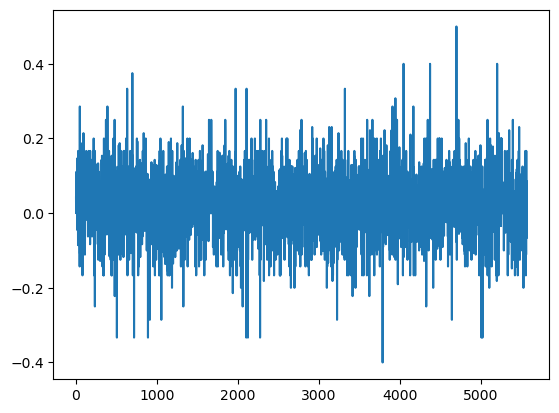

In [37]:
df['Sentiment'].plot()

In [38]:
df['Sentiment'] > 0

0        True
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570     True
5571    False
Name: Sentiment, Length: 5572, dtype: bool

In [39]:
df[df['Sentiment'] > 0]

,Category,Message,Sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",0.041667
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.054054
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0.076923
6,ham,Even my brother is not like to speak with me. ...,0.111111
8,spam,WINNER!! As a valued network customer you have...,0.093750
...,...,...,...
5555,ham,Yeh. Indians was nice. Tho it did kane me off ...,0.069767
5563,ham,Ard 6 like dat lor.,0.166667
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,0.066667
5567,spam,This is the 2nd time we have tried 2 contact u...,0.085714


In [40]:
df[df['Sentiment'] < 0]

,Category,Message,Sentiment
17,ham,Eh u remember how 2 spell his name... Yes i di...,-0.045455
19,spam,England v Macedonia - dont miss the goals/team...,-0.035714
25,ham,Just forced myself to eat a slice. I'm really ...,-0.085714
31,ham,Yeah he got in at 2 and was v apologetic. n ha...,-0.020833
33,ham,For fear of fainting with the of all that hous...,-0.055556
...,...,...,...
5535,ham,"I know you are thinkin malaria. But relax, chi...",-0.044776
5558,ham,"Sorry, I'll call later",-0.166667
5559,ham,if you aren't here in the next &lt;#&gt; hou...,-0.050000
5561,ham,Get me out of this dump heap. My mom decided t...,-0.111111


In [42]:
df[df['Sentiment'] == 0]

,Category,Message,Sentiment
1,ham,Ok lar... Joking wif u oni...,0.0
3,ham,U dun say so early hor... U c already then say...,0.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0.0
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0.0
...,...,...,...
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,0.0
5564,ham,Why don't you wait 'til at least wednesday to ...,0.0
5565,ham,Huh y lei...,0.0
5568,ham,Will ü b going to esplanade fr home?,0.0


In [43]:
def sentiment_classifier(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [45]:
df['Sentiment'].apply(sentiment_classifier)

0       1
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569   -1
5570    1
5571    0
Name: Sentiment, Length: 5572, dtype: int64

In [46]:
df['Sentiment_class'] = df['Sentiment'].apply(sentiment_classifier)

In [48]:
df

,Category,Message,Sentiment,Sentiment_class
0,ham,"Go until jurong point, crazy.. Available only ...",0.041667,1
1,ham,Ok lar... Joking wif u oni...,0.000000,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.054054,1
3,ham,U dun say so early hor... U c already then say...,0.000000,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.000000,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0.085714,1
5568,ham,Will ü b going to esplanade fr home?,0.000000,0
5569,ham,"Pity, * was in mood for that. So...any other s...",-0.066667,-1
5570,ham,The guy did some bitching but I acted like i'd...,0.074074,1


In [49]:
df['Sentiment_class'].value_counts()

 0    2946
 1    1821
-1     805
Name: Sentiment_class, dtype: int64

<AxesSubplot:>

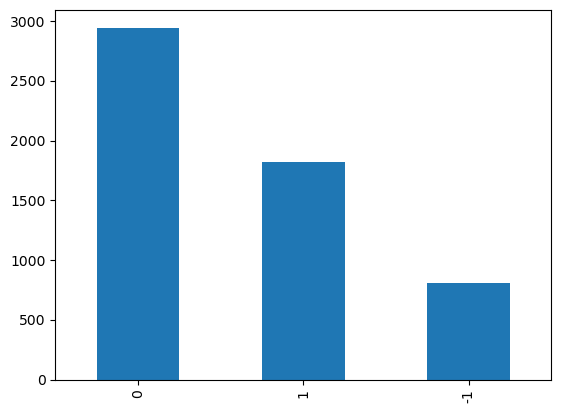

In [50]:
df['Sentiment_class'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Sentiment_class'>

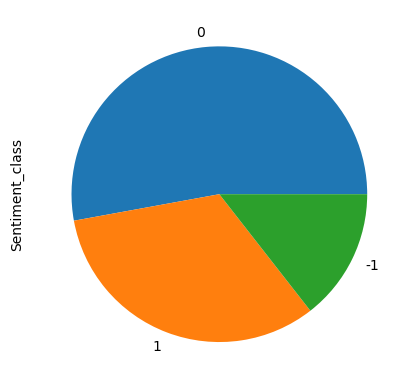

In [51]:
df['Sentiment_class'].value_counts().plot(kind='pie')

# Well, well well

![](https://media.tenor.com/Vz0ScNMhdzsAAAAM/benedict-cumberbatch-well-done.gif)

# We have achieved our very 1st task

## You all now know how to do a sentiment anaysis on text

# Now, all that remains is 
- Classification
- Clustering

# For that, we will first need to cover some ML. Onwards

![](https://media.tenor.com/khFYlvYDWA8AAAAC/napoleon-gosh.gif)